In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("NYPD_Complaint_Data_Historic.csv")

def lookup(s):
   dates = {date:pd.to_datetime(date, errors='coerce') for date in s.unique()}
   return s.map(dates)

/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['CMPLNT_FR_DT_datetime'] = lookup(df['CMPLNT_FR_DT'])
df['CMPLNT_year'] = df['CMPLNT_FR_DT_datetime'].apply(lambda x: x.year)

In [4]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DT_datetime,CMPLNT_year
0,554829619,05/19/2014,08:30:00,05/20/2014,11:30:00,122.0,05/20/2014,578,HARRASSMENT 2,637.0,...,40.560905,-74.111266,"(40.560905178, -74.111266419)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,F,2014-05-19,2014.0
1,219274724,05/19/2014,08:15:00,05/19/2014,14:00:00,67.0,05/20/2014,341,PETIT LARCENY,338.0,...,40.646899,-73.920683,"(40.646898754, -73.920682979)",PATROL BORO BKLYN SOUTH,NaN,<18,BLACK,M,2014-05-19,2014.0
2,609429777,05/19/2014,08:00:00,05/19/2014,23:50:00,114.0,05/20/2014,107,BURGLARY,221.0,...,40.770199,-73.924771,"(40.770199058, -73.924770963)",PATROL BORO QUEENS NORTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,M,2014-05-19,2014.0
3,981103394,05/19/2014,08:00:00,05/19/2014,08:10:00,112.0,05/20/2014,126,MISCELLANEOUS PENAL LAW,198.0,...,40.730596,-73.863409,"(40.730596278, -73.863409224)",PATROL BORO QUEENS NORTH,NaN,45-64,BLACK,F,2014-05-19,2014.0
4,768067271,05/19/2014,06:30:00,05/19/2014,07:00:00,114.0,05/20/2014,578,HARRASSMENT 2,637.0,...,40.761468,-73.902859,"(40.761468108, -73.902858614)",PATROL BORO QUEENS NORTH,NaN,45-64,BLACK,M,2014-05-19,2014.0


In [5]:
housing = df[df['CMPLNT_year']>=2006].groupby(['HADEVELOPT','CMPLNT_year']).size().unstack().sort_values(2018,ascending=False)

In [6]:
df[df.HADEVELOPT == 'CASTLE HILL'].head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DT_datetime,CMPLNT_year
486,511604800,05/19/2014,18:41:00,05/19/2014,19:09:00,43.0,05/19/2014,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,...,40.819215,-73.847168,"(40.819214568, -73.847167915)",PATROL BORO BRONX,NaN,45-64,BLACK,F,2014-05-19,2014.0
1952,292277175,05/18/2014,17:30:00,05/18/2014,17:40:00,43.0,05/18/2014,235,DANGEROUS DRUGS,567.0,...,40.819432,-73.845552,"(40.819431994, -73.845552435)",PATROL BORO BRONX,NaN,NaN,UNKNOWN,E,2014-05-18,2014.0
2183,266178280,05/18/2014,11:40:00,NaN,NaN,43.0,05/18/2014,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,40.818769,-73.850529,"(40.818768839, -73.850528931)",PATROL BORO BRONX,NaN,NaN,BLACK,M,2014-05-18,2014.0
2259,884450481,05/18/2014,09:10:00,NaN,NaN,43.0,05/18/2014,578,HARRASSMENT 2,638.0,...,40.819215,-73.847168,"(40.819214568, -73.847167915)",PATROL BORO BRONX,NaN,18-24,BLACK,M,2014-05-18,2014.0
2482,986300337,05/18/2014,02:50:00,05/18/2014,03:00:00,43.0,05/18/2014,578,HARRASSMENT 2,638.0,...,40.819215,-73.847168,"(40.819214568, -73.847167915)",PATROL BORO BRONX,NaN,25-44,BLACK,F,2014-05-18,2014.0


In [7]:
df.groupby(by='HADEVELOPT').Latitude.median().head()

HADEVELOPT
1010 EAST 178TH STREET         40.841184
1162-1176 WASHINGTON AVENUE    40.830612
131 SAINT NICHOLAS AVENUE      40.803763
1471 WATSON AVENUE             40.825726
303 VERNON AVENUE              40.695792
Name: Latitude, dtype: float64

In [8]:
df.groupby(by='HADEVELOPT').Longitude.median().head()

HADEVELOPT
1010 EAST 178TH STREET        -73.879894
1162-1176 WASHINGTON AVENUE   -73.907282
131 SAINT NICHOLAS AVENUE     -73.952698
1471 WATSON AVENUE            -73.880890
303 VERNON AVENUE             -73.939096
Name: Longitude, dtype: float64

In [9]:
housing['Latitude'] = df.groupby(by='HADEVELOPT').Latitude.median()
housing['Longitude'] = df.groupby(by='HADEVELOPT').Longitude.median()

In [10]:
housing = housing[housing[2018.0] > 0]
housing['name'] = housing.index
# housing.to_csv("NYCHA-summary.csv", index=False)

In [63]:
housing['difference'] = housing[2018.0] - housing[2006.0]
housing.sort_values(by='difference', ascending=False).head(20)

CMPLNT_year,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,Latitude,Longitude,name,difference
HADEVELOPT,,,,,,,,,,,,,,,,,
COOPER PARK,108.0,141.0,148.0,153.0,166.0,127.0,162.0,171.0,150.0,145.0,162.0,195.0,212.0,40.717779,-73.938313,COOPER PARK,104.0
STAPLETON,195.0,186.0,160.0,199.0,242.0,235.0,259.0,247.0,248.0,254.0,203.0,229.0,274.0,40.621795,-74.081980,STAPLETON,79.0
SMITH,238.0,301.0,284.0,277.0,268.0,282.0,277.0,267.0,235.0,325.0,339.0,330.0,313.0,40.710838,-73.998533,SMITH,75.0
RIIS,100.0,150.0,104.0,104.0,138.0,147.0,157.0,148.0,121.0,137.0,118.0,138.0,172.0,40.725333,-73.974718,RIIS,72.0
SUMNER,212.0,231.0,219.0,234.0,216.0,226.0,258.0,260.0,216.0,210.0,263.0,331.0,283.0,40.697154,-73.940883,SUMNER,71.0
BAY VIEW,141.0,204.0,142.0,174.0,197.0,217.0,191.0,174.0,187.0,218.0,245.0,212.0,212.0,40.632425,-73.887593,BAY VIEW,71.0
LATIMER GARDENS,25.0,29.0,17.0,26.0,22.0,41.0,17.0,30.0,31.0,39.0,58.0,73.0,84.0,40.765651,-73.831067,LATIMER GARDENS,59.0
ALBANY,150.0,164.0,208.0,260.0,202.0,210.0,233.0,218.0,178.0,170.0,177.0,148.0,205.0,40.674086,-73.937711,ALBANY,55.0
WALD,167.0,187.0,176.0,188.0,198.0,169.0,218.0,191.0,189.0,196.0,269.0,263.0,212.0,40.721115,-73.977569,WALD,45.0


In [12]:
cp = df[df.HADEVELOPT == 'COOPER PARK']
cp.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DT_datetime,CMPLNT_year
7298,257302871,04/13/2014,18:00:00,04/15/2014,18:00:00,94.0,05/15/2014,109,GRAND LARCENY,401.0,...,40.718454,-73.937106,"(40.71845417, -73.937105529)",PATROL BORO BKLYN NORTH,NaN,45-64,BLACK,M,2014-04-13,2014.0
8059,292407210,05/14/2014,11:00:00,05/14/2014,12:00:00,94.0,05/14/2014,578,HARRASSMENT 2,638.0,...,40.718870,-73.939793,"(40.718870066, -73.939792704)",PATROL BORO BKLYN NORTH,NaN,65+,WHITE HISPANIC,F,2014-05-14,2014.0
10233,491481760,05/09/2014,01:00:00,05/09/2014,01:10:00,94.0,05/13/2014,126,MISCELLANEOUS PENAL LAW,198.0,...,40.719262,-73.938313,"(40.719261783, -73.938313278)",PATROL BORO BKLYN NORTH,NaN,25-44,BLACK,F,2014-05-09,2014.0
10662,798523026,05/12/2014,18:00:00,NaN,NaN,94.0,05/12/2014,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,40.717377,-73.939347,"(40.717376682, -73.939346736)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,F,2014-05-12,2014.0
11532,906488139,05/11/2014,01:00:00,NaN,NaN,94.0,05/12/2014,126,MISCELLANEOUS PENAL LAW,198.0,...,40.717231,-73.938257,"(40.717230631, -73.938257439)",PATROL BORO BKLYN NORTH,NaN,25-44,BLACK,F,2014-05-11,2014.0


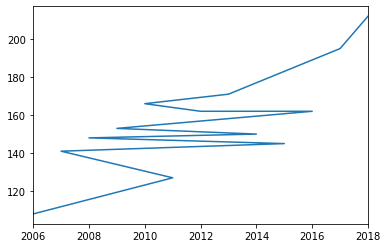

In [13]:
cp[cp.CMPLNT_year > 2005].sort_values(by='CMPLNT_year').CMPLNT_year.value_counts().plot()

In [14]:
cp[cp.CMPLNT_year > 2005].CMPLNT_year.value_counts()

2018.0    212
2017.0    195
2013.0    171
2010.0    166
2012.0    162
2016.0    162
2009.0    153
2014.0    150
2008.0    148
2015.0    145
2007.0    141
2011.0    127
2006.0    108
Name: CMPLNT_year, dtype: int64

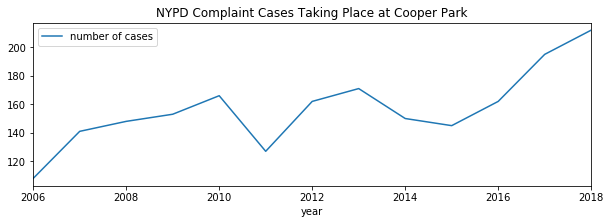

In [61]:
df2 = pd.DataFrame({
    'year': [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'number of cases': [108, 141, 148, 153, 166, 127, 162, 171, 150, 145, 162, 195, 212]
 })
df2.plot(x='year', y='number of cases', figsize=(10,3), title= 'NYPD Complaint Cases Taking Place at Cooper Park')
plt.savefig("Cooper park numbers.png")

In [16]:
cp[cp.CMPLNT_year == 2006.0].PD_DESC.value_counts().head(10)

ASSAULT 3                         12
HARASSMENT,SUBD 3,4,5             12
CONTROLLED SUBSTANCE, POSSESSI    11
HARASSMENT,SUBD 1,CIVILIAN         9
AGGRAVATED HARASSMENT 2            8
ASSAULT 2,1,UNCLASSIFIED           7
ROBBERY,OPEN AREA UNCLASSIFIED     5
MISCHIEF, CRIMINAL 4, OF MOTOR     5
MARIJUANA, POSSESSION 4 & 5        4
CONTROLLED SUBSTANCE, SALE 5       4
Name: PD_DESC, dtype: int64

In [17]:
cp[cp.CMPLNT_year == 2018.0].PD_DESC.value_counts().head(10)

HARASSMENT,SUBD 3,4,5               34
AGGRAVATED HARASSMENT 2             24
ASSAULT 3                           20
CRIMINAL CONTEMPT 1                 20
CONTROLLED SUBSTANCE, POSSESSI      14
HARASSMENT,SUBD 1,CIVILIAN          10
ASSAULT 2,1,UNCLASSIFIED             7
MENACING,UNCLASSIFIED                7
CRIMINAL MISCHIEF,UNCLASSIFIED 4     7
TRESPASS 2, CRIMINAL                 6
Name: PD_DESC, dtype: int64

In [39]:
s1 = pd.DataFrame(cp[cp.CMPLNT_year == 2006.0].PD_DESC.value_counts())
s2 = pd.DataFrame(cp[cp.CMPLNT_year == 2018.0].PD_DESC.value_counts())
compare = pd.concat([s1, s2], axis=1)

/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
compare.columns = ['2006', '2018']
compare = compare.sort_values(by='2018', ascending=False).head(6).transpose().reset_index()

In [48]:
compare['year'] = compare['index']
compare = compare.drop(columns=['index'])

In [49]:
melted = compare.melt(id_vars='year', var_name='crime_type', value_name='crime_count')
melted

,year,crime_type,crime_count
0,2006,"HARASSMENT,SUBD 3,4,5",12.0
1,2018,"HARASSMENT,SUBD 3,4,5",34.0
2,2006,AGGRAVATED HARASSMENT 2,8.0
3,2018,AGGRAVATED HARASSMENT 2,24.0
4,2006,ASSAULT 3,12.0
5,2018,ASSAULT 3,20.0
6,2006,CRIMINAL CONTEMPT 1,2.0
7,2018,CRIMINAL CONTEMPT 1,20.0
8,2006,"CONTROLLED SUBSTANCE, POSSESSI",11.0
9,2018,"CONTROLLED SUBSTANCE, POSSESSI",14.0


# How to change circle size?

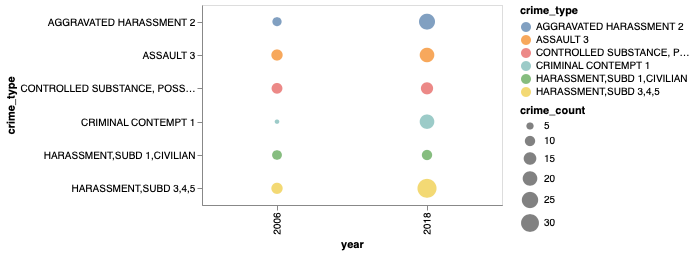

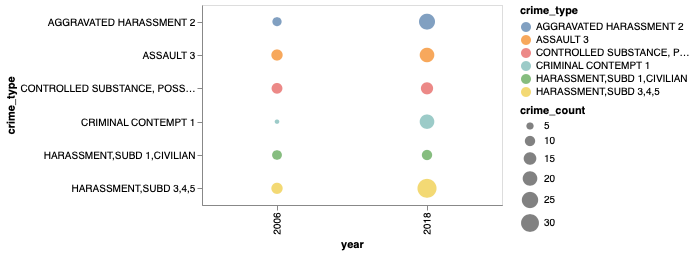

In [58]:
import altair as alt
alt.renderers.enable('notebook')

chart = alt.Chart(melted, width=300, height=200).mark_circle().encode(
    x='year',
    y='crime_type',
    size='crime_count',
    color='crime_type'
)
chart